# NES NTSC

In [1]:
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt

In [2]:
from ntsc_py import NES_PALETTE, rgb2nes, nes2rgb

In [3]:
imgs = []
for rgb in NES_PALETTE:
    img = np.zeros((128, 128, 3), dtype=np.uint8)
    img[:] = rgb
    imgs.append(img)
imgs = np.array(imgs)
# convert the images to a matrix of of images
imgs = np.array(imgs).reshape((4, 16, 128, 128, 3))
# swap the axis at index 1 and 2 and concatenate
# axis 0 to combine the rows of images
imgs = np.moveaxis(imgs, 1, 2)
imgs = np.concatenate(imgs, axis=0)
# swap axis 0 with 1, then 1 with 2 and concatenate
# axis 0 to combine the columns of images
imgs = np.moveaxis(np.moveaxis(imgs, 0, 1), 1, 2)
imgs = np.concatenate(imgs, axis=0)
# transpose the image back to the normal dimensions
imgs = np.moveaxis(imgs, 0, 1)
imgs.shape

(512, 2048, 3)

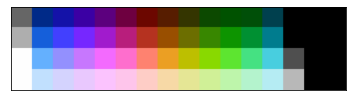

In [6]:
ax = plt.imshow(imgs)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.savefig('img/nes-palette.svg')

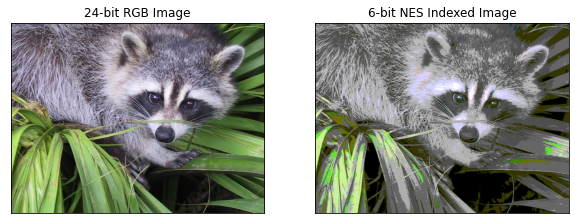

In [7]:
img = face()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = plt.imshow(img)
plt.title('24-bit RGB Image')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.subplot(1, 2, 2)
ax = plt.imshow(nes2rgb(rgb2nes(img)))
plt.title('6-bit NES Indexed Image')
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.savefig('img/nes-indexed-image.png', bbox_inches='tight')